<center><h3> Project </h3> </center>
<center><h3> Pricing the Options in Financial Market </h3> </center>
<center><h4> Submitted by: Anand Prakash Saini</h4> </center>

# Objective:

- Model and simulate the pricing of European Call options using the Black-Scholes formula. 

- Compare black scholes and Monte carlo simulation.

- Model with varying volatility.

# Theory:

- **Financial Market:** A market in which people trade financial securities and derivatives at low transaction costs. Some of the securities include stocks and bonds, raw materials and precious metals, which are known in the financial markets as commodities.

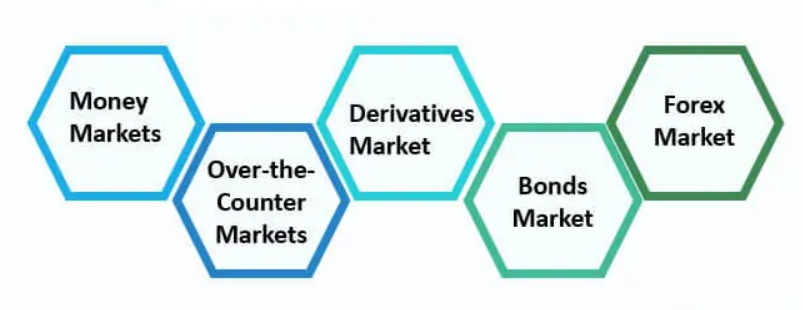

Picture from:https://www.educba.com/financial-markets/

- **Derivatives market:** Financial market for derivatives, financial instruments like futures contracts or options, which are derived from other forms of assets. The market can be divided into two, that for exchange-traded derivatives and that for over-the-counter derivatives. 


- **Derivatives:** In finance, a derivative is a contract that derives its value from the performance of an underlying entity. This underlying entity can be an asset, index, or interest rate. Derivatives can be used for a number of purposes, including insuring against price movements (hedging), increasing exposure to price movements for speculation, or getting access to otherwise hard-to-trade assets or markets. Some of the more common derivatives include forwards, futures, options, swaps.


- **Options:** Financial instrument that is based on the value of underlying securities, such as stocks, indexes, and exchange-traded funds (ETFs). An options contract offers the buyer the opportunity to buy or sell—depending on the type of contract they hold—the underlying asset. Each options contract will have a specific expiration date by which the holder must exercise their option. 

    - Types of Options:
        - **Call Option**: gives the holder the right, but not the obligation, to buy the underlying security at the strike price on or before expiration. A call option will therefore become more valuable as the underlying security rises in price.
        - **Put Option:** gives the holder the right, but not the obligation, to instead sell the underlying stock at the strike price on or before expiration. 

    - **American vs. European Options:** American options can be exercised at any time between the date of purchase and the expiration date.  European options are different from American options in that they can only be exercised at the end of their lives on their expiration date.
    
**How to price an Option?**

The factors determining the value of an option broadly includes:
- The current stock price
- Strike Price
- Time to expiration
- Volatility
- Interest rates

Effects and Definition:

- The current market price of the underlying asset: As the price of the underlying asset increases, the price of a call option typically increases and the price of a put option typically decreases.

- The strike price: The further the strike price is from the current market price of the underlying asset, the lower the price of a call option and the higher the price of a put option.

- Time to expiration: As the expiration date approaches, the price of an option may decrease, as there is less time for the underlying asset to move in the desired direction.

- Volatility: Higher volatility increases the potential for large price movements in the underlying asset, which can increase the price of both call and put options.

- Interest rates: Higher interest rates may increase the cost of holding a position in an option, which can decrease the price of both call and put options.

# Procedure:

**Objective-1: Model and numerically simulate the pricing of call European options using the Black-Scholes formula.**

In financial literature, a Stock's price is said to be following geometric brownian motion, assuming a neutral risk scenario. 

Let's take the simplest hypothetical case when the volatility is 0, it is simillar to scenario of a deposit in savings account with interest rate $r$ per annum. The change can be written as:

$$ dS= r S dt $$

we then know with certainty the price of stock at given time, by separating and intergrating we can write:

$$ \int_{0}^{T} \frac{dS}{S} = \int_{0}^{T} r dt $$

which gives,

$$ S_{T} = S_{0} e^{rT} $$

Where, $S_{0}$ is the price of the stock now and $S{t}$ is the price at given time T.
 
However, since stock prices have randomness we need to include a stochastic term in the equation above. To capture the randomness inherent in stock markets we add another term and are SDE is defined as follows:

$$dS = S\,r dt +S\sigma dz$$

Where, 

- $dS$: Infinitesimal change in the stock price over an infinitesimal time interval $𝑑𝑡$.

- S: This is the current stock price at time 

- $r$:risk-free interest rate

- $\sigma$: Volatility of the stock price, a measure of the stock's price fluctuations.

- $dz$: Small increment of a Wiener process (or Brownian motion), which introduces randomness into the model. The Wiener process increment $dz$ is normally distributed with a mean of 0 and a variance of $dt$.

The equation can be interpreted as follows:

**Deterministic Part:** $S r dt$

- The stock price grows at a rate proportional to the current price and the risk-free rate $r$.

**Stochastic Part:** $S \sigma dz$

- The stock price is subject to random fluctuations, scaled by the current price and the volatility $\sigma$.


for a small increment $ \Delta{t}$, the descretized form is:

$$  S_{t+\Delta t} = S_t + S_t \, r \, \Delta t + S_t \, \sigma \, \Delta z $$

where $ \Delta z $ is a Wiener process increment, which can be approximated as $\Delta z \approx \sqrt{\Delta t} \, z $ with $z $ being a standard normal random variable.

Rearranging, we get:

$$  S_{t+\Delta t} = S_t \left(1 + r \, \Delta t + \sigma \, \sqrt{\Delta t} \, z \right)$$

Alternatively, in exponential form:

$$S_{T} = S_{t} e^{\left(\left(r - \frac{1}{2}\sigma^{2}\right)(T) + \sigma \sqrt{T}\,z\right)} $$

We can simulate the process above using the Monte Carlo method. As an example, we set $ r = 0.06 $, $ \sigma = 0.3 $, $T = 1$, and $S_{t} = 100 $. We make $I = 1000 $ iterations and choose $ M = 100 $ intervals for the time interval discretization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Parameters
r = 0.06          # Risk-free rate
sigma = 0.3       # Volatility
T = 1.0           # Time horizon (in years)
S0 = 100          # Initial stock price
iterations = 1000  # Number of Monte Carlo iterations
intervals = 100   # Number of time intervals
dt = T / intervals  # Time step size

# Initialize the stock price array
# S has dimensions (intervals + 1) x iterations
# The first dimension corresponds to time steps
# The second dimension corresponds to different simulation paths
S = np.zeros((intervals + 1, iterations))
S[0] = S0  # Set the initial stock price for all simulation paths

# Simulate the stock price paths
for t in range(1, intervals + 1):
    # Generate standard normal random variables for each iteration
    z = np.random.standard_normal(iterations)
    
    # Update the stock price for each path using the discretized geometric Brownian motion equation
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# S now contains the simulated stock price paths

This should follow a log-normal distribution:

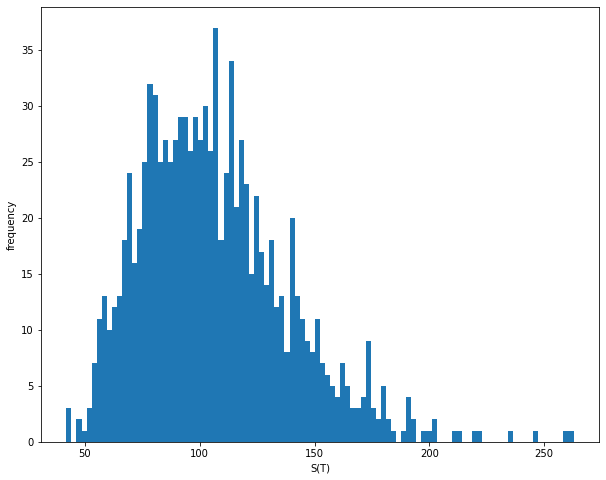

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(S[-1], bins=100)
plt.xlabel("S(T)")
plt.ylabel("frequency")
plt.show()

A few stock prices path:

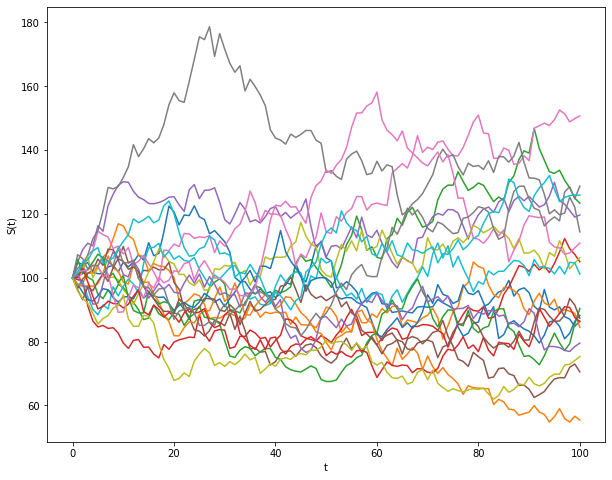

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(S[:, :20])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.show()

**Pricing with Monte carlo Method:**

With our simulated stock prices, following are the steps to calculate the price of a European call option via Monte Carlo method:

- Simulate stock price paths according to SDE dynamics.
- Calculate the terminal option payoff for each path.
- Obtain the average expected payoff at maturity, T.
- Discount the average expected payoff to time t.

In [3]:
def monte_carlo_sim(S, K, r, sigma, T, iterations):
    """
    Monte Carlo simulation for European call option .

    INput:
    S : Initial stock price
    K : Strike price of the option
    r : Risk-free interest rate
    sigma : Volatility of the stock
    T : Time to maturity
    t : Current time
    iterations : Number of Monte Carlo iterations

    Returns: Estimated price of the European call option
    """
    
    # Generate random standard normal variables for the simulation
    z = np.random.normal(0, 1, iterations)
    
    # Simulate stock prices at maturity T
    ST = S * np.exp((r - 0.5 * sigma**2) * (T) + sigma * np.sqrt(T) * z)
    
    # Calculate the payoff for each simulated stock price
    payoffs = np.maximum(K-ST, 0)
    
    # Calculate the average payoff
    average_payoff = np.mean(payoffs)
    
    # Discount the average payoff back to present value
    call_price = np.exp(-r * (T)) * average_payoff
    
    return call_price

Let’s see the pricing power of the previous function with a European call option with the following characteristics:​

- $S_0=100$
- $K=95$
- $r=0.06$
- $\sigma = 0.3$
- $T = 1$ year
- Number of iterations $I=1000$

In [4]:
print("Option Price calculated by Monte Carlo Method:", monte_carlo_sim(100, 95, 0.06, 0.3, 1, 1000))

Option Price calculated by Monte Carlo Method: 7.156837929972458


**Pricing with Black Scoles Model:**

The model makes several key assumptions:

- **Efficient Markets:** Market movements are random and follow a geometric Brownian motion with constant drift and volatility.

- **Risk-Free Rate:** The risk-free interest rate is constant and known.

- **Constant Volatility:** The volatility of the underlying asset’s returns is constant and known.

- **Log-Normally Distributed Returns:** The returns on the underlying asset are normally distributed.

The Black-Scholes formula for a European call option is given by:

$$ 𝐶 = 𝑆_{0}⋅𝑁(d_{1}) − 𝐾⋅e^{−r𝑇}⋅𝑁(d_{2}) $$

Where:

- 𝐶: price of the call option.
- $S_{0}$: Current stock price.
- K: Strike price of the option.
- r: Risk-free interest rate.
- T: Time to maturity (in years).
- $\sigma$: Volatility of the stock’s returns.
- 𝑁(x): Cumulative distribution function of the standard normal distribution.

The values $d_{1}$ and $d_{2}$ are calculated as:

- $d_{1} = \frac{log(\frac{S_{0}}{K}) + (\frac{r+\sigma^{2}}{2})T}{\sigma \sqrt{T}}$
⁡
    - $d_{1}$ represents a normalized measure of how far the current stock price $S_{0}$ is above the strike price $K$, taking into account the expected growth rate of the stock (risk-free rate $r$ and the volatility ($\sigma$) over the time to maturity $T$.
    - $N(d_1)$ can be interpreted as the risk-neutral probability that the option will be exercised (i.e., that the stock price will be above the strike price at expiration). It considers both the drift and volatility of the stock price.


- $d_{2} = d_{1} - \sigma\sqrt{T}$
    - $d_{2}$ adjusts $d_{1}$ by subtracting the term $\sigma\sqrt{T}$, which accounts for the volatility of the stock price. This term represents the distance in standard deviations that the stock price must travel to reach the strike price by expiration.
    - $N(d_{2})$ is the risk-neutral probability that the stock price will be above the strike price, assuming it follows a normal distribution. In other words, $N(d_{2})$is the probability of the option finishing in the money, adjusted for the fact that the stock price must exceed the strike price plus the expected change due to volatility.

In [7]:
import numpy as np
from scipy.stats import norm

def bs_call_price(S, r, sigma, T, K):
    """
    Calculate the Black-Scholes price of a European call option.

    Parameters:
    S : Current stock price
    r : Risk-free interest rate
    sigma : Volatility of the stock
    T : Time to maturity
    K : Strike price of the option

    Returns:
    float
        Black-Scholes price of the European call option
    """

    # Time to maturity
    ttm = T

    # If time to maturity is negative, return 0 (option has expired)
    if ttm < 0:
        return 0.0
    # If time to maturity is zero, return the value of the option
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    # Calculate the volatility adjusted for time to maturity
    vol = sigma * np.sqrt(ttm)

    # Calculate d1 and d2 using the Black-Scholes formula
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * ttm) / vol
    d2 = d1 - vol

    # Calculate the call option price using the Black-Scholes formula
    call_price = S * norm.cdf(d1) - K * np.exp(-r * ttm) * norm.cdf(d2)

    return call_price

In [8]:
print("Option Price calculated by Monte Carlo Method:", round(monte_carlo_sim(100, 95, 0.06, 0.3, 1, 1000),4))
print("Option Price calculated by Black Scholes Analytical Model:", round(bs_call_price(100, 0.06, 0.3,1, 95),4))

Option Price calculated by Monte Carlo Method: 17.6652
Option Price calculated by Black Scholes Analytical Model: 17.3236


**Convergence of Monte carlo Method to the closed form anylytical solution (Black Scholes model) depends on the number of iterations**

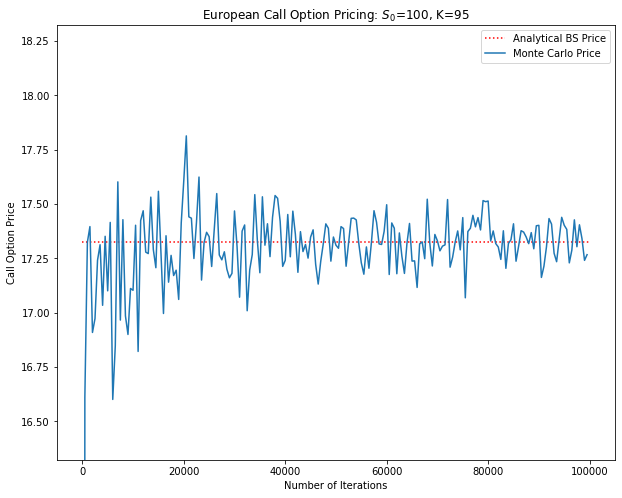

In [9]:
# Create a DataFrame to store iteration counts and Monte Carlo prices
results_df = pd.DataFrame(columns=["Iterations", "MonteCarloPrice"])

# Perform Monte Carlo simulations with varying numbers of iterations
for iterations in range(1, 100000, 500):
    mc_price = monte_carlo_sim(100, 95, 0.06, 0.3, 1, iterations)
    results_df = results_df.append(
        {"Iterations": iterations, "MonteCarloPrice": mc_price},
        ignore_index=True
    )

plt.figure(figsize=(10, 8))

# Plot the analytical Black-Scholes price as a horizontal line
analytical_bs_price = bs_call_price(100, 0.06, 0.3, 1, 95)
plt.hlines(analytical_bs_price,xmin=0, xmax=100000, linestyle="dotted", colors="red", label="Analytical BS Price",)

# Plot the Monte Carlo simulation results
plt.plot(results_df["Iterations"], results_df["MonteCarloPrice"], lw=1.5, label="Monte Carlo Price")

plt.title("European Call Option Pricing: $S_0$=100, K=95")
plt.xlabel("Number of Iterations")
plt.ylabel("Call Option Price")
plt.ylim(analytical_bs_price - 1, analytical_bs_price + 1,)
plt.legend()
plt.show()

In [10]:
print("Option Price calculated by Monte Carlo Method:", round(monte_carlo_sim(100, 95, 0.06, 0.3, 1, 100000),4))
print("Option Price calculated by Black Scholes Analytical Model:", round(bs_call_price(100, 0.06, 0.3,1, 95),4))

Option Price calculated by Monte Carlo Method: 17.2682
Option Price calculated by Black Scholes Analytical Model: 17.3236


## Some Tests:
Base Parameters:
- Current stock price. $S=100$
- Strike price, $K=95$
- Risk-free interest rate, $r=0.06$
- Volatility, $\sigma = 0.3$
- Time to maturity (in years), $T = 1$ 

In [11]:
# Base parameters
S_base = 100    # Current stock price
K_base = 95    # Strike price
r_base = 0.06   # Risk-free interest rate
sigma_base = 0.3 # Volatility
T_base = 1.0    # Time to maturity (in years)

**Varying Stock Prices**:

Effects: Call Option prices increases as stock price increases.
- A higher current stock price means the stock is closer to or already above the strike price, making it more likely that exercising the option will be profitable.

Varying Stock Price:
Stock Price: 80, Call Option Price: 6.0575
Stock Price: 90, Call Option Price: 10.9677
Stock Price: 100, Call Option Price: 17.3236
Stock Price: 110, Call Option Price: 24.8394
Stock Price: 120, Call Option Price: 33.2098


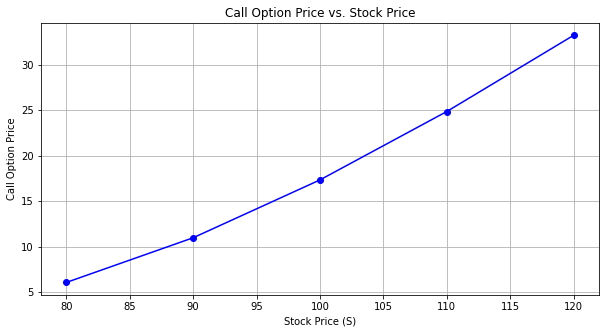

In [12]:
# Test varying stock price
stock_prices = [80, 90, 100, 110, 120]
prices = []
print("Varying Stock Price:")
for S in stock_prices:
    price = round(bs_call_price(S, r_base, sigma_base, T_base, K_base),4)
    prices.append(price)
    print(f"Stock Price: {S}, Call Option Price: {price}")

# Plotting
plt.figure(figsize=(10, 5))  
plt.plot(stock_prices, prices, marker='o', linestyle='-', color='b')
plt.title('Call Option Price vs. Stock Price')
plt.xlabel('Stock Price (S)')  
plt.ylabel('Call Option Price')
plt.grid(True) 
plt.show() 

**Varying strike price:**

Call Option Prices decreases as strike price increases.
-  A higher strike price requires the stock to reach a higher value to be profitable, making the option less valuable.

Varying Strike Price:
Strike Price: 85, Call Option Price: 23.4982
Strike Price: 95, Call Option Price: 17.3236
Strike Price: 105, Call Option Price: 12.4227
Strike Price: 115, Call Option Price: 8.6999
Strike Price: 125, Call Option Price: 5.9739


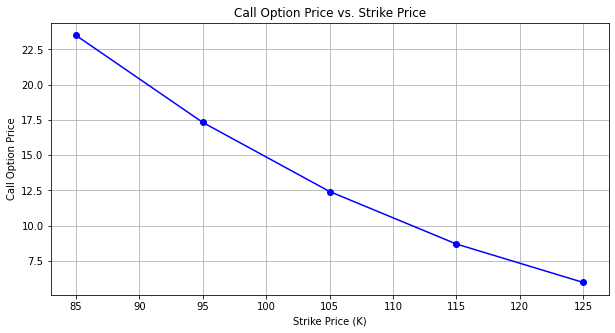

In [13]:
# Test varying strike price
strike_prices = [85, 95, 105, 115, 125]
prices = []
print("Varying Strike Price:")
for K in strike_prices:
    price = round(bs_call_price(S_base, r_base, sigma_base, T_base, K),4)
    prices.append(price)
    print(f"Strike Price: {K}, Call Option Price: {price}")
    
# Plotting
plt.figure(figsize=(10, 5))  
plt.plot(strike_prices, prices, marker='o', linestyle='-', color='b')
plt.title('Call Option Price vs. Strike Price')
plt.xlabel('Strike Price (K)')  
plt.ylabel('Call Option Price')
plt.grid(True) 
plt.show() 

**Varying risk-free rate**

Call Option Price are expected to increases as interest rate increases.

- Higher interest rates reduce the present value of the strike price (the amount you'd pay to exercise the option in the future), making the call option more attractive.

Varying Risk-Free Rate:
Risk-Free Rate: 0.01, Call Option Price: 14.7805
Risk-Free Rate: 0.03, Call Option Price: 15.7766
Risk-Free Rate: 0.05, Call Option Price: 16.8012
Risk-Free Rate: 0.07, Call Option Price: 17.8523
Risk-Free Rate: 0.09, Call Option Price: 18.9277


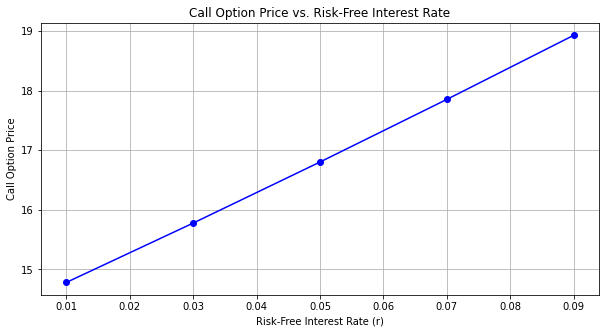

In [14]:
# Test varying risk-free rate
risk_free_rates = [0.01, 0.03, 0.05, 0.07, 0.09]
prices = []
print("Varying Risk-Free Rate:")
for r in risk_free_rates:
    price = round(bs_call_price(S_base, r, sigma_base, T_base, K_base),4)
    prices.append(price)
    print(f"Risk-Free Rate: {r}, Call Option Price: {price}")

# Plotting
plt.figure(figsize=(10, 5))  
plt.plot(risk_free_rates, prices, marker='o', linestyle='-', color='b')
plt.title('Call Option Price vs. Risk-Free Interest Rate')
plt.xlabel('Risk-Free Interest Rate (r)')  
plt.ylabel('Call Option Price')
plt.grid(True) 
plt.show() 

**Varying volatility**

Prices increase as volatility increases.

- Higher volatility means a greater potential range of future stock prices, increasing the likelihood that the stock price will move significantly above the strike price, thereby increasing the options' values.

Varying Volatility:
Volatility: 0.1, Call Option Price: 11.1645
Volatility: 0.2, Call Option Price: 13.9461
Volatility: 0.3, Call Option Price: 17.3236
Volatility: 0.4, Call Option Price: 20.8525
Volatility: 0.5, Call Option Price: 24.4191


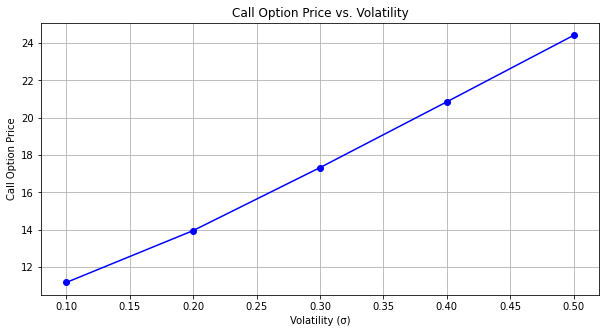

In [15]:
# Test varying volatility
volatilities = [0.1, 0.2, 0.3, 0.4, 0.5]
prices = []
print("Varying Volatility:")
for sigma in volatilities:
    price = round(bs_call_price(S_base, r_base, sigma, T_base, K_base),4)
    prices.append(price)
    print(f"Volatility: {sigma}, Call Option Price: {price}")

# Plotting
plt.figure(figsize=(10, 5))  
plt.plot(volatilities, prices, marker='o', linestyle='-', color='b')
plt.title('Call Option Price vs. Volatility')
plt.xlabel('Volatility (σ)')  
plt.ylabel('Call Option Price')
plt.grid(True) 
plt.show() 


**Varying time to maturity**

Prices generally increase with more time to maturity.

- More time allows more opportunity for the stock price to move favorably. For call options, more time increases the chance that the stock price will rise above the strike price. 

Varying Time to Maturity:
Time to Maturity: 0.1, Call Option Price: 7.1124
Time to Maturity: 0.5, Call Option Price: 12.6073
Time to Maturity: 1.0, Call Option Price: 17.3236
Time to Maturity: 1.5, Call Option Price: 21.1853
Time to Maturity: 2.0, Call Option Price: 24.5708


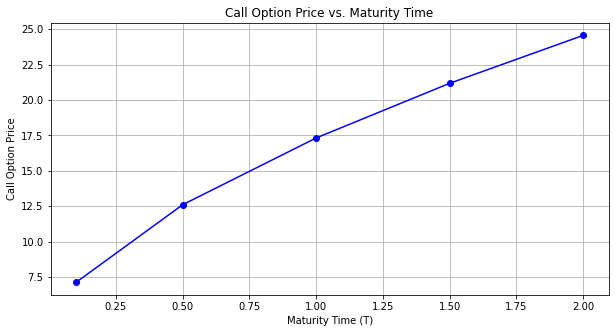

In [16]:
# Test varying time to maturity
times_to_maturity = [0.1, 0.5, 1.0, 1.5, 2.0]
prices = []
print("Varying Time to Maturity:")
for T in times_to_maturity:
    price = round(bs_call_price(S_base, r_base, sigma_base, T, K_base),4)
    prices.append(price)
    print(f"Time to Maturity: {T}, Call Option Price: {price}")
    
# Plotting
plt.figure(figsize=(10, 5))  
plt.plot(times_to_maturity, prices, marker='o', linestyle='-', color='b')
plt.title('Call Option Price vs. Maturity Time')
plt.xlabel('Maturity Time (T)')  
plt.ylabel('Call Option Price')
plt.grid(True) 
plt.show() 

**Limitations of Black Scholes Model**

- Frictions in the Market: The model does not take into consideration the transaction fees and levies that are present in real-world marketplaces.
- Volatility Assumption: The idea that market volatility is constant is false since market volatility fluctuates.
- Asset Price Movements: The model makes the assumption that asset prices would always fluctuate, which may not always be the case.

**References:**

- https://en.wikipedia.org/wiki/Financial_market
- https://www.investopedia.com/terms/o/option.asp
- https://www.geeksforgeeks.org/black-scholes-model/
- https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model
